In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv("../out/history/episode_history_model_training.csv")

In [3]:
train_run = pd.read_csv("../out/history/episode_history_model_train.csv")
test_run = pd.read_csv("../out/history/episode_history_model_test.csv")

In [4]:
training.head()

,Episode Number,Turn Number,Policy 1,Policy 2,Policy 3,Chosen Policy Number,Policy Accepted,Money,Food,Reputation,Pollution,Oil Power Amount,Tidal Power Amount
0,1,1,PlantGrant,NoWayHome,RobbinFood,1,True,5000,10,100,0,10,3
1,1,2,PetroBigBro,RedGreenBurn,TreeToFood,1,False,198,13,111,0,10,3
2,1,3,PetroBigBro,RedGreenBurn,TreeToFood,0,False,0,13,107,0,10,3
3,2,1,PetroBigBro,TreeToFood,RobbinFood,3,False,5000,10,100,0,10,3
4,2,2,RedGreenBurn,PlantGrant,NoWayHome,3,False,4053,10,87,3,11,2


In [5]:
training.columns

Index(['Episode Number', 'Turn Number', 'Policy 1', 'Policy 2', 'Policy 3',
       'Chosen Policy Number', 'Policy Accepted', 'Money', 'Food',
       'Reputation', 'Pollution', 'Oil Power Amount', 'Tidal Power Amount'],
      dtype='object')

In [6]:
def get_episode_choice_history(episodes_df):
    return list(
        map(
            lambda x: x[1],
            sorted(
                {
                    episode_num: [
                        (
                            row[
                                game_history.columns.get_loc(
                                    "Policy 1"
                                    if row[
                                        game_history.columns.get_loc(
                                            "Chosen Policy Number"
                                        )
                                    ]
                                    == 1
                                    else "Policy 2"
                                    if row[
                                        game_history.columns.get_loc(
                                            "Chosen Policy Number"
                                        )
                                    ]
                                    == 2
                                    else "Policy 3"
                                )
                            ],
                            row[game_history.columns.get_loc("Policy Accepted")],
                        )
                        for row in game_history.values[:-1]
                    ]
                    for episode_num, game_history in episodes_df.groupby("Episode Number")
                }.items(),
                key=lambda x: x[0],
            ),
        )
    )

In [7]:
def get_episode_options_and_choice_history(episodes_df):
    return list(
        map(
            lambda x: x[1],
            sorted(
                {
                    episode_num: [
                        (
                            row[game_history.columns.get_loc("Policy 1")],
                            row[game_history.columns.get_loc("Policy 2")],
                            row[game_history.columns.get_loc("Policy 3")],
                            row[
                                game_history.columns.get_loc(
                                    "Policy 1"
                                    if row[
                                        game_history.columns.get_loc(
                                            "Chosen Policy Number"
                                        )
                                    ]
                                    == 1
                                    else "Policy 2"
                                    if row[
                                        game_history.columns.get_loc(
                                            "Chosen Policy Number"
                                        )
                                    ]
                                    == 2
                                    else "Policy 3"
                                )
                            ],
                            row[game_history.columns.get_loc("Policy Accepted")],
                        )
                        for row in game_history.values[:-1]
                    ]
                    for episode_num, game_history in episodes_df.groupby(
                        "Episode Number"
                    )
                }.items(),
                key=lambda x: x[0],
            ),
        )
    )

## Training
Questions:
1. The number of turns survived over successive episodes.
2. What is the frequency of any one choice as training goes on?

In [8]:
episodes = training.groupby("Episode Number")

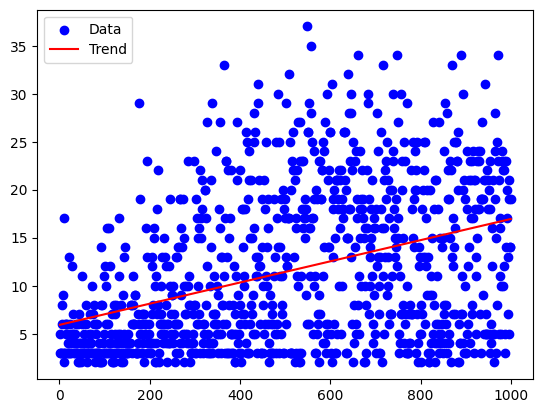

In [9]:
episode_lengths = training["Episode Number"].value_counts().sort_index()
slope, intercept = np.polyfit(episode_lengths.index, episode_lengths.values, 1)
plt.scatter(episode_lengths.index, episode_lengths.values, color="blue", label="Data")
plt.plot(episode_lengths.index, [ slope * x + intercept for x in episode_lengths.index ], color="red", label="Trend")
plt.legend()

In [10]:
episode_choice_history = list(
    map(
        lambda x: x[1],
        sorted(
            {
                episode_num: [
                    (
                        row[
                            game_history.columns.get_loc(
                                "Policy 1"
                                if row[
                                    game_history.columns.get_loc("Chosen Policy Number")
                                ]
                                == 1
                                else "Policy 2"
                                if row[
                                    game_history.columns.get_loc("Chosen Policy Number")
                                ]
                                == 2
                                else "Policy 3"
                            )
                        ],
                        row[game_history.columns.get_loc("Policy Accepted")],
                    )
                    for row in game_history.values[:-1]
                ]
                for episode_num, game_history in episodes
            }.items(),
            key=lambda x: x[0],
        ),
    )
)
episode_choice_history[:5]

[[('PlantGrant', True), ('PetroBigBro', False)],
 [('RobbinFood', False),
  ('NoWayHome', False),
  ('PetroBigBro', True),
  ('RedGreenBurn', True)],
 [('RobbinFood', False), ('PlantGrant', True)],
 [('PetroBigBro', False), ('PlantGrant', False)],
 [('PetroBigBro', False),
  ('TreeToFood', True),
  ('RobbinFood', True),
  ('PlantGrant', False),
  ('RedGreenBurn', True)]]

In [11]:
episode_choice_running_frequency = [
    pd.Series([i for list in episode_choice_history[: idx + 1] for i in list])
    .value_counts()
    .to_dict()
    for idx, episode in enumerate(episode_choice_history)
]
episode_choice_running_frequency[-5:]

[{('TreeToFood', True): 2772,
  ('PetroBigBro', True): 1957,
  ('NoWayHome', True): 1409,
  ('PlantGrant', True): 975,
  ('RobbinFood', True): 883,
  ('RedGreenBurn', True): 420,
  ('PlantGrant', False): 373,
  ('RedGreenBurn', False): 344,
  ('RobbinFood', False): 339,
  ('NoWayHome', False): 313,
  ('PetroBigBro', False): 312,
  ('TreeToFood', False): 277},
 {('TreeToFood', True): 2780,
  ('PetroBigBro', True): 1962,
  ('NoWayHome', True): 1412,
  ('PlantGrant', True): 976,
  ('RobbinFood', True): 884,
  ('RedGreenBurn', True): 420,
  ('PlantGrant', False): 373,
  ('RedGreenBurn', False): 344,
  ('RobbinFood', False): 339,
  ('NoWayHome', False): 314,
  ('PetroBigBro', False): 313,
  ('TreeToFood', False): 277},
 {('TreeToFood', True): 2783,
  ('PetroBigBro', True): 1964,
  ('NoWayHome', True): 1416,
  ('PlantGrant', True): 978,
  ('RobbinFood', True): 886,
  ('RedGreenBurn', True): 420,
  ('PlantGrant', False): 373,
  ('RedGreenBurn', False): 344,
  ('RobbinFood', False): 339,
  ('N

In [12]:
choices = [choice for choice, _ in episode_choice_running_frequency[-1].items()]
y_vals = {
    choice: [
        entry[choice] if choice in entry else 0
        for entry in episode_choice_running_frequency
    ]
    for choice in choices
}

### Accept vs reject

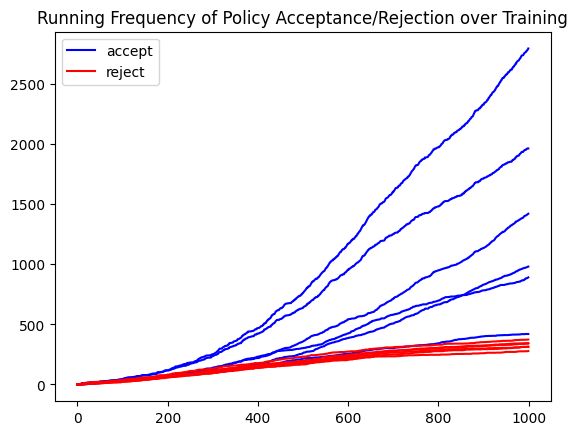

In [13]:
for choice in choices:
    plt.plot(y_vals[choice], color=("blue" if choice[1] else "red"), label=("accept" if choice[1] else "reject"))
plt.title("Running Frequency of Policy Acceptance/Rejection over Training")
plt.legend([plt.Line2D([], [], color='blue'), plt.Line2D([], [], color='red')], ['accept', 'reject'])

### Accepted Policies

In [14]:
available_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
label_colors = { label:color for label, color in zip([label for label, _ in choices], available_colors) }
label_colors

{'TreeToFood': 'blue',
 'PetroBigBro': 'green',
 'NoWayHome': 'red',
 'PlantGrant': 'cyan',
 'RobbinFood': 'magenta',
 'RedGreenBurn': 'yellow'}

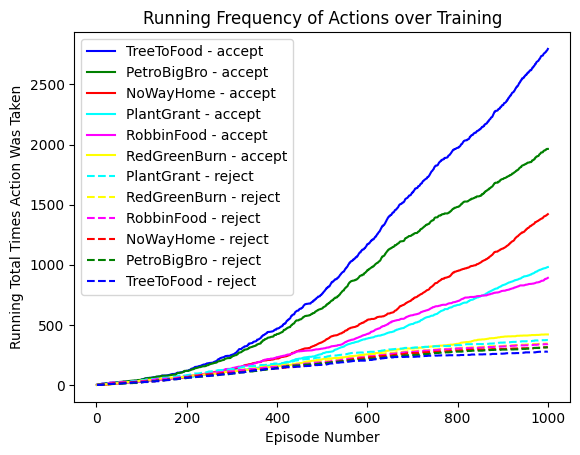

In [15]:

for choice in sorted(choices, key=lambda x: y_vals[x][-1], reverse=True):
    label, accepted = choice
    plt.plot(list(range(1, len(y_vals[choice])+1)), y_vals[choice], color=label_colors[label], linestyle=('-' if accepted else '--'), label=f"{label} - {'accept' if accepted else 'reject'}")
plt.xlabel("Episode Number")
plt.ylabel("Running Total Times Action Was Taken")
plt.title("Running Frequency of Actions over Training")
plt.legend()

In [16]:
train_run_history = get_episode_options_and_choice_history(train_run)
test_run_history = get_episode_options_and_choice_history(test_run)

In [17]:
(train_run_history + test_run_history)[:5]

[[('PlantGrant', 'NoWayHome', 'RobbinFood', 'RobbinFood', True),
  ('PetroBigBro', 'RedGreenBurn', 'TreeToFood', 'TreeToFood', True),
  ('PlantGrant', 'NoWayHome', 'PetroBigBro', 'PetroBigBro', True),
  ('RedGreenBurn', 'PlantGrant', 'TreeToFood', 'TreeToFood', True),
  ('RobbinFood', 'NoWayHome', 'PetroBigBro', 'PetroBigBro', True),
  ('RedGreenBurn', 'PlantGrant', 'RobbinFood', 'RobbinFood', True),
  ('NoWayHome', 'PlantGrant', 'RobbinFood', 'RobbinFood', True),
  ('RedGreenBurn', 'TreeToFood', 'RobbinFood', 'TreeToFood', True),
  ('PetroBigBro', 'PlantGrant', 'NoWayHome', 'NoWayHome', True),
  ('RobbinFood', 'RedGreenBurn', 'TreeToFood', 'TreeToFood', True),
  ('PetroBigBro', 'PlantGrant', 'RobbinFood', 'RobbinFood', True),
  ('RedGreenBurn', 'TreeToFood', 'NoWayHome', 'TreeToFood', True),
  ('PetroBigBro', 'PlantGrant', 'RedGreenBurn', 'PlantGrant', True),
  ('NoWayHome', 'RedGreenBurn', 'PlantGrant', 'PlantGrant', True),
  ('RobbinFood', 'PetroBigBro', 'RedGreenBurn', 'PetroBigBro

In [18]:
policy_names = list(set([label for label, _ in choices]))
policy_names

['TreeToFood',
 'RedGreenBurn',
 'PetroBigBro',
 'RobbinFood',
 'NoWayHome',
 'PlantGrant']

In [19]:
runs_combined_flattened = [
    item for list in (train_run_history + test_run_history) for item in list
]
runs_combined_flattened[:5]

[('PlantGrant', 'NoWayHome', 'RobbinFood', 'RobbinFood', True),
 ('PetroBigBro', 'RedGreenBurn', 'TreeToFood', 'TreeToFood', True),
 ('PlantGrant', 'NoWayHome', 'PetroBigBro', 'PetroBigBro', True),
 ('RedGreenBurn', 'PlantGrant', 'TreeToFood', 'TreeToFood', True),
 ('RobbinFood', 'NoWayHome', 'PetroBigBro', 'PetroBigBro', True)]

In [20]:
[i for i in runs_combined_flattened]

[('PlantGrant', 'NoWayHome', 'RobbinFood', 'RobbinFood', True),
 ('PetroBigBro', 'RedGreenBurn', 'TreeToFood', 'TreeToFood', True),
 ('PlantGrant', 'NoWayHome', 'PetroBigBro', 'PetroBigBro', True),
 ('RedGreenBurn', 'PlantGrant', 'TreeToFood', 'TreeToFood', True),
 ('RobbinFood', 'NoWayHome', 'PetroBigBro', 'PetroBigBro', True),
 ('RedGreenBurn', 'PlantGrant', 'RobbinFood', 'RobbinFood', True),
 ('NoWayHome', 'PlantGrant', 'RobbinFood', 'RobbinFood', True),
 ('RedGreenBurn', 'TreeToFood', 'RobbinFood', 'TreeToFood', True),
 ('PetroBigBro', 'PlantGrant', 'NoWayHome', 'NoWayHome', True),
 ('RobbinFood', 'RedGreenBurn', 'TreeToFood', 'TreeToFood', True),
 ('PetroBigBro', 'PlantGrant', 'RobbinFood', 'RobbinFood', True),
 ('RedGreenBurn', 'TreeToFood', 'NoWayHome', 'TreeToFood', True),
 ('PetroBigBro', 'PlantGrant', 'RedGreenBurn', 'PlantGrant', True),
 ('NoWayHome', 'RedGreenBurn', 'PlantGrant', 'PlantGrant', True),
 ('RobbinFood', 'PetroBigBro', 'RedGreenBurn', 'PetroBigBro', True),
 ('Tr

In [21]:
policy_strengths = [(policy, len([0 for _, _, _, choice, _ in runs_combined_flattened if choice == policy]), len([0 for policy_1, policy_2, policy_3, _, _ in runs_combined_flattened if policy in [policy_1, policy_2, policy_3]])) for policy in policy_names]
policy_strengths = [(policy, chosen, total, chosen/total) for policy, chosen, total in policy_strengths]
policy_strengths

[('TreeToFood', 12682, 14692, 0.8631908521644432),
 ('RedGreenBurn', 0, 20777, 0.0),
 ('PetroBigBro', 7899, 16492, 0.478959495512976),
 ('RobbinFood', 4201, 18915, 0.22209886333597673),
 ('NoWayHome', 7727, 17322, 0.44608012931532154),
 ('PlantGrant', 3354, 19391, 0.17296684028673096)]

Text(0.5, 1.0, 'Policy Selection Rate During Agent Playtest')

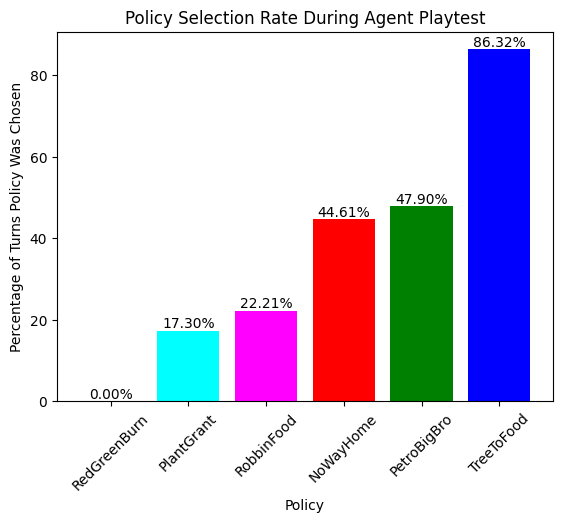

In [32]:
for i, (policy, chosen, total, strength) in enumerate(sorted(policy_strengths, key=lambda x: x[3])):
    plt.bar(policy, strength*100, color=label_colors[policy])
    plt.text(i, strength*100, f"{strength*100:.2f}%", ha='center', va='bottom')
plt.xlabel("Policy")
plt.xticks(rotation=45)
plt.ylabel("Percentage of Turns Policy Was Chosen")
plt.title("Policy Selection Rate During Agent Playtest")

In [27]:
total_turns = len(runs_combined_flattened)
print(total_turns)

35863


Text(0.5, 1.0, 'Policy Draw Rate During Playtest')

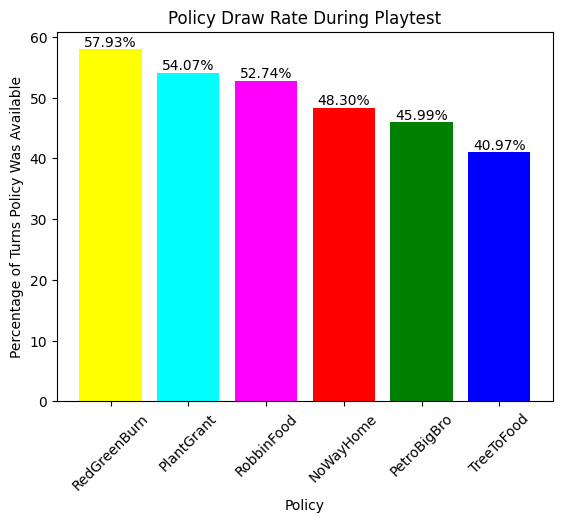

In [31]:
for i, (policy, _, total, _) in enumerate(sorted(policy_strengths, key=lambda x: x[3])):
    freq_percent = (total/total_turns)*100
    plt.bar(policy, freq_percent, color=label_colors[policy])
    plt.text(i, freq_percent, f"{freq_percent:.2f}%", ha='center', va='bottom')
plt.xlabel("Policy")
plt.xticks(rotation=45)
plt.ylabel("Percentage of Turns Policy Was Available")
plt.title("Policy Draw Rate During Playtest")